In [1]:
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [49]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [106]:
content_image = imageio.imread(r"C:\Users\zongzhimin\Desktop\model\model_1500_1000.bmp")

In [107]:
content_image.shape

(1001, 1519, 3)

In [108]:
vp = content_image[:1000,:1500,2]

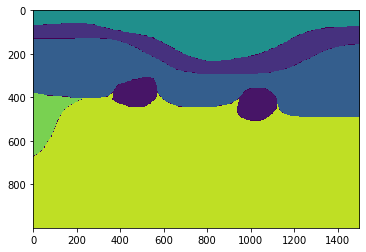

In [109]:
plt.imshow(vp)

In [110]:
vp[:,450]

Array([127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
         0,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,   0,  76,  76,  76,  76,  76,  76,
        76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  7

In [111]:
vp = np.where(vp==127,1800,vp)
vp = np.where(vp==36,2500,vp)
vp = np.where(vp==76,3500,vp)
vp = np.where(vp==204,4000,vp)
vp = np.where(vp==231,4500,vp)
vp = np.where(vp==14,5500,vp)

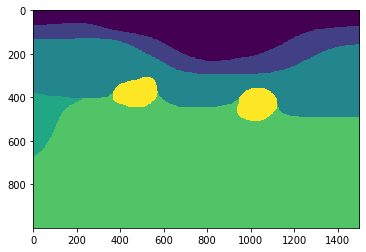

In [133]:
plt.imshow(vp)

In [132]:
len(np.where(vp == 0)[0])

0

In [131]:
np.where(vp == 0)

(array([], dtype=int64), array([], dtype=int64))

In [130]:
for i in range(1000):
    for j in range(1500):
        if vp[i,j]!=1800 and vp[i,j]!=2500 and vp[i,j]!=3500 and vp[i,j]!=4000 and vp[i,j]!=4500 and vp[i,j]!=5500:
            vp[i,j] = vp[i-1,j]

In [134]:
np.save(r'C:\Users\zongzhimin\Desktop\model\vp_1500_1000',vp)

In [135]:
vp.shape

(1000, 1500)

In [136]:
vpdata = vp

In [137]:
vsdata = vpdata / np.sqrt(3)

In [6]:
# img = Image.open(r"C:\Users\zongzhimin\Desktop\model\model.bmp")

In [22]:
# img = img.resize((300, 200))
# img.save(r"C:\Users\zongzhimin\Desktop\model\model_200_300.jpg")

In [5]:
m_rho = np.fromfile(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m.rho',dtype=np.float32)
m_vp = np.fromfile(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m.vp',dtype=np.float32)
m_vs = np.fromfile(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m.vs',dtype=np.float32)

In [8]:
m_rho = m_rho.reshape(300,200)
m_vp = m_vp.reshape(300,200)
m_vs = m_vs.reshape(300,200)

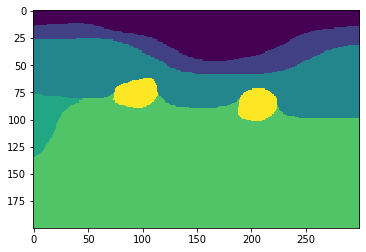

In [11]:
plt.imshow(m_vs.T)

In [15]:
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m_rho_200_300.txt',m_rho.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m_vp_200_300.txt',m_vp.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\model_200_300\m_vs_200_300.txt',m_vs.T)

In [2]:
import obspy

In [3]:
st = obspy.read(r'C:\Users\zongzhimin\Desktop\model2\testdata\su_y.su.shot'+str(1))
st.write(r'C:\Users\zongzhimin\Desktop\model2\testdata\segy_y.shot'+str(1),format='segy')

D:\development\Anaconda3\lib\site-packages\obspy\io\segy\core.py:366: UserWarning: CREATING TRACE HEADER
  warnings.warn("CREATING TRACE HEADER")


In [94]:
for i in range(1,77):
    st = obspy.read(r'\\10.1.4.151\share\zzm\data\others\model_1\su_1500_100\su_x.su.shot'+str(i))
    st.write(r'\\10.1.4.151\share\zzm\data\others\model_1\segy_1500_1000\segy_x.shot'+str(i),format='segy')

In [95]:
for i in range(1,77):
    st = obspy.read(r'\\10.1.4.151\share\zzm\data\others\model_1\su_1500_100\su_y.su.shot'+str(i))
    st.write(r'\\10.1.4.151\share\zzm\data\others\model_1\segy_1500_1000\segy_y.shot'+str(i),format='segy')

In [11]:
s = obspy.read(r'C:\Users\zongzhimin\Desktop\model2\hdk_segy_proc\model_1_y.segy')

SEGYTraceReadingError: Too little data left in the file to unpack it according to
                  its trace header. This is most likely either due to a wrong
                  byte order or a corrupt file.

In [14]:
qp = np.ones((400,600),dtype=np.float32)*100
qs = np.ones((400,600),dtype=np.float32)*80

In [15]:
qp.T.tofile(r'C:\Users\zongzhimin\Desktop\model2\m_1.qp')
qs.T.tofile(r'C:\Users\zongzhimin\Desktop\model2\m_1.qs')

In [17]:
vs = np.zeros((400,600),dtype=np.float32)

In [18]:
vs.T.tofile(r'C:\Users\zongzhimin\Desktop\model2\m_1.vs')

In [27]:
vp = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.vp',dtype=np.float32)
vs = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.vs',dtype=np.float32)
rho = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.rho',dtype=np.float32)
qp = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.qp',dtype=np.float32)
qs = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.qs',dtype=np.float32)

In [28]:
vp = vp.reshape((600,400))
vs = vs.reshape((600,400))
rho = rho.reshape((600,400))
qp = qp.reshape((600,400))
qs = qs.reshape((600,400))

In [29]:
vp.shape

(600, 400)

In [34]:
vp.T[:,500//5:2500//5].shape

(400, 400)

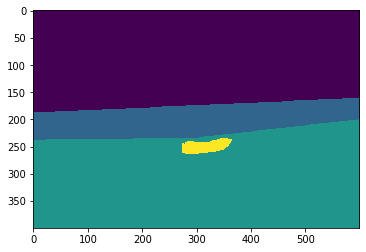

In [24]:
plt.imshow(vp.T)

In [35]:
vp = vp.T[:,500//5:2500//5]
vs = vs.T[:,500//5:2500//5]
rho = rho.T[:,500//5:2500//5]
qp = qp.T[:,500//5:2500//5]
qs = qs.T[:,500//5:2500//5]

In [47]:
vp.shape

(400, 400)

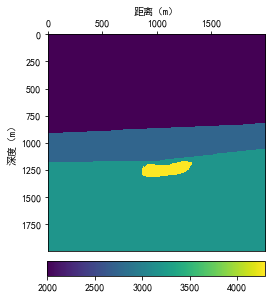

In [80]:
plt.imshow(vp)
plt.xlabel('距离（m）')
plt.ylabel('深度（m）')
plt.xticks([0,100,200,300],[0,500,1000,1500])
plt.yticks([0,50,100,150,200,250,300,350],[0,250,500,750,1000,1250,1500,1750])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig(r'C:\Users\zongzhimin\Desktop\model2\model\模型1.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)
cax = plt.axes([0.26,0.04,0.505,0.05])
plt.colorbar(cax=cax,orientation='horizontal')

In [58]:
vp2 = np.fromfile(r'C:\Users\zongzhimin\Desktop\model2\m_2.vp',dtype=np.float32)
vp2 = vp2.reshape((600,600))
vp2 = vp2.T

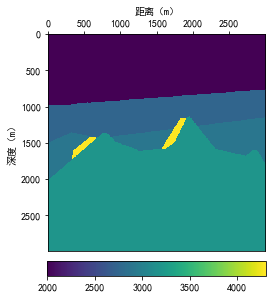

In [82]:
plt.imshow(vp2)
plt.xlabel('距离（m）')
plt.ylabel('深度（m）')
plt.xticks([0,100,200,300,400,500],[0,500,1000,1500,2000,2500])
plt.yticks([0,100,200,300,400,500],[0,500,1000,1500,2000,2500])
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig(r'C:\Users\zongzhimin\Desktop\model2\model\模型2.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)
cax = plt.axes([0.26,0.04,0.505,0.05])
plt.colorbar(cax=cax,orientation='horizontal')

In [41]:
vp.T.tofile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.vp')
vs.T.tofile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.vs')
rho.T.tofile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.rho')
qp.T.tofile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.qp')
qs.T.tofile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.qs')

In [42]:
vs = np.zeros((600,600),dtype=np.float32)
vs.T.tofile(r'C:\Users\zongzhimin\Desktop\model2\m_2.vs')

In [ ]:
vp = np.loadtxt(r'C:\Users\zongzhimin\Desktop\model\vp.txt')
vs = np.loadtxt(r'C:\Users\zongzhimin\Desktop\model\vs.txt')
rho = np.loadtxt(r'C:\Users\zongzhimin\Desktop\model\rho.txt')

In [ ]:
vp = vp.astype(np.float32)
vs = vs.astype(np.float32)
rho = rho.astype(np.float32)

In [ ]:
plt.imshow(vp)

In [ ]:
vp.T.tofile(r'C:\Users\zongzhimin\Desktop\model\m.vp')
vs.T.tofile(r'C:\Users\zongzhimin\Desktop\model\m.vs')
rho.T.tofile(r'C:\Users\zongzhimin\Desktop\model\m.rho')

In [ ]:
vp_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.vp',dtype=np.float32)
vs_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.vs',dtype=np.float32)
rho_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.rho',dtype=np.float32)

In [ ]:
vp_m1 = vp_m1.reshape((400,400))
vs_m1 = vs_m1.reshape((400,400))
rho_m1 = rho_m1.reshape((400,400))

In [ ]:
plt.imshow(vp_m1.T)

In [ ]:
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_vp.txt',vp_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_vs.txt',vs_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_rho.txt',rho_m1.T)

In [ ]:
vp_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.vp',dtype=np.float32)
vs_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.vs',dtype=np.float32)
rho_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.rho',dtype=np.float32)

In [ ]:
vp_m1 = vp_m1.reshape((600,400))
vs_m1 = vs_m1.reshape((600,400))
rho_m1 = rho_m1.reshape((600,400))

In [ ]:
plt.imshow(vp_m1.T)

In [ ]:
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_vp.txt',vp_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_vs.txt',vs_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_rho.txt',rho_m1.T)

In [83]:
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_vp.txt',vp_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_vs.txt',vs_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_rho.txt',rho_m1.T)

In [91]:
vp = vp.astype(np.float32)
vs = vs.astype(np.float32)
rho = rho.astype(np.float32)

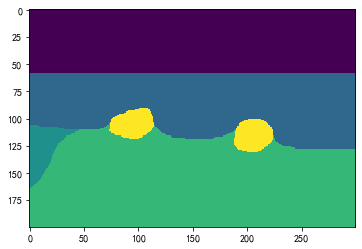

In [92]:
plt.imshow(vp)

In [93]:
vp.T.tofile(r'C:\Users\zongzhimin\Desktop\model\m.vp')
vs.T.tofile(r'C:\Users\zongzhimin\Desktop\model\m.vs')
rho.T.tofile(r'C:\Users\zongzhimin\Desktop\model\m.rho')

In [99]:
vp_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.vp',dtype=np.float32)
vs_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.vs',dtype=np.float32)
rho_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_400\m.rho',dtype=np.float32)

In [104]:
vp_m1 = vp_m1.reshape((400,400))
vs_m1 = vs_m1.reshape((400,400))
rho_m1 = rho_m1.reshape((400,400))

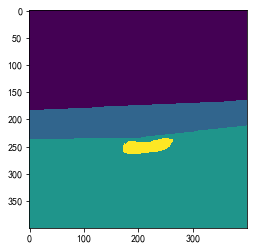

In [103]:
plt.imshow(vp_m1.T)

In [105]:
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_vp.txt',vp_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_vs.txt',vs_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_rho.txt',rho_m1.T)

In [116]:
vp_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.vp',dtype=np.float32)
vs_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.vs',dtype=np.float32)
rho_m1 = np.fromfile(r'\\10.1.4.151\share\zzm\data\others\model_2\model_400_600\m_1.rho',dtype=np.float32)

In [117]:
vp_m1 = vp_m1.reshape((600,400))
vs_m1 = vs_m1.reshape((600,400))
rho_m1 = rho_m1.reshape((600,400))

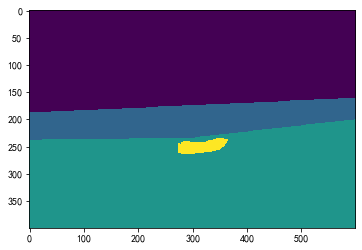

In [118]:
plt.imshow(vp_m1.T)

In [119]:
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_vp.txt',vp_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_vs.txt',vs_m1.T)
np.savetxt(r'C:\Users\zongzhimin\Desktop\model\txt\m_1_400_600_rho.txt',rho_m1.T)